### **0. Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### **1. Input Data**
load the training data file ('data.txt')  
each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$  
$x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [2]:
uploaded = files.upload()

Saving data-nonlinear.txt to data-nonlinear.txt


Plotting the training data


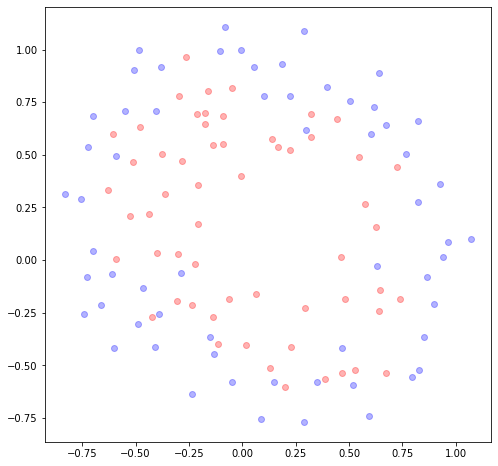

118
118


In [6]:
data = np.genfromtxt("data-nonlinear.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]

print("Plotting the training data")
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

print(len(x)) #100
print(len(y))
#print(type(x))
#print(y_label0)
#print(type(x_label0))

### **2. Logistic Regression**
1) Linear Model
<br>
$\ z = \theta_0 + \theta_1x + \theta_2y  $  
$\sigma(z) = \frac{1}{1 + \exp(-z)}$
<br>  
2) Objective Function
<br>
$\ J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$
<br>  
3) Gradient Descent
<br>
$\ \theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$  
$\ \theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$  
$\ \theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$  
<br>
4) HyperParameters Setting
<br>
$\ \theta_0^{(0)} = -10$  
$\ \theta_1^{(0)} = 20$  
$\ \theta_2^{(0)} = -10$
<br>
$\ lr = 2*10^{-2}$



In [0]:
def sigmoidFunction(z):
  result = 1/(1 + math.e**-z)
  return result

In [0]:
def objectiveFunction(x_data, y_data, class_data, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7,
                      theta_8, theta_9, theta_10, theta_11, theta_12, theta_13, theta_14, theta_15):
  cost = 0
  predictions = deque()
  for i in range(0, 118):
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * pow(x_data[i],2) + theta_3 * pow(x_data[i],3)
                            + theta_4 * pow(x_data[i],4) + theta_5 * y_data[i] + theta_6 * pow(y_data[i],2) + theta_7 * pow(y_data[i],3)
                            + theta_8 * pow(y_data[i],4) + theta_9 * x_data[i] * y_data[i] + theta_10 * pow(x_data[i],2) * y_data[i]
                            + theta_11 * x_data[i] * pow(y_data[i],2) + theta_12 * pow(x_data[i],3) * y_data[i] + theta_13 * x_data[i] * pow(y_data[i],3)
                            + theta_14 * pow(x_data[i],2)*pow(y_data[i],3) + theta_15 * pow(x_data[i],3)*pow(y_data[i],2)) 
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log10(estimate)) - (1-class_data[i])*np.log10(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 118
  #print("Cost",i,"번째",cost)
  return cost

In [0]:
def gradientDescent(x_data, y_data, class_data, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7,
                      theta_8, theta_9, theta_10, theta_11, theta_12, theta_13, theta_14, theta_15):
  for i in range(0, 118):
    lr = 0.0001
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * pow(x_data[i],2) + theta_3 * pow(x_data[i],3)
                            + theta_4 * pow(x_data[i],4) + theta_5 * y_data[i] + theta_6 * pow(y_data[i],2) + theta_7 * pow(y_data[i],3)
                            + theta_8 * pow(y_data[i],4) + theta_9 * x_data[i] * y_data[i] + theta_10 * pow(x_data[i],2) * y_data[i]
                            + theta_11 * x_data[i] * pow(y_data[i],2) + theta_12 * pow(x_data[i],3) * y_data[i] + theta_13 * x_data[i] * pow(y_data[i],3)
                            + theta_14 * pow(x_data[i],2)*pow(y_data[i],3) + theta_15 * pow(x_data[i],3)*pow(y_data[i],2) ) - class_data[i]
    theta_0 -= lr * estimate / 118
    theta_1 -= lr * estimate * x_data[i] / 118
    theta_2 -= lr * estimate * pow(x_data[i],2) / 118
    theta_3 -= lr * estimate * pow(x_data[i],3) / 118
    theta_4 -= lr * estimate * pow(x_data[i],4) / 118
    theta_5 -= lr * estimate * y_data[i] / 118
    theta_6 -= lr * estimate * pow(y_data[i],2) / 118
    theta_7 -= lr * estimate * pow(y_data[i],3) / 118
    theta_8 -= lr * estimate * pow(y_data[i],4) / 118
    theta_9 -= lr * estimate * x_data[i] * y_data[i] / 118
    theta_10 -= lr * estimate * pow(x_data[i],2) * y_data[i] / 118
    theta_11 -= lr * estimate * x_data[i] * pow(y_data[i],2) / 118
    theta_12 -= lr * estimate * pow(x_data[i],3) * y_data[i] / 118
    theta_13 -= lr * estimate * x_data[i] * pow(y_data[i],3) / 118
    theta_14 -= lr * estimate * pow(x_data[i],2) * pow(y_data[i],3) / 118
    theta_15 -= lr * estimate * pow(x_data[i],3) * pow(y_data[i],2) / 118
  return theta_0, theta_1, theta_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


-28.545075056129765 0.24208676355033734 0.24221710983606887
Plotting the Estimated Parameters


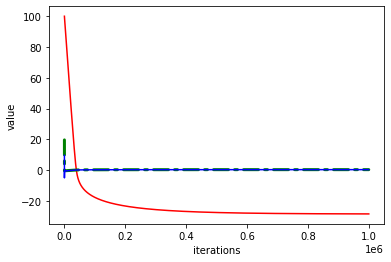

Plotting the Training Error


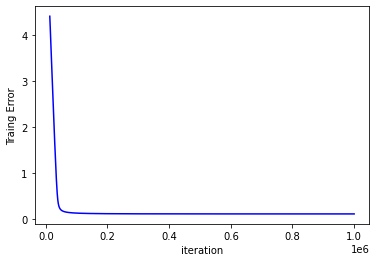

Plotting the Obtained Classifer


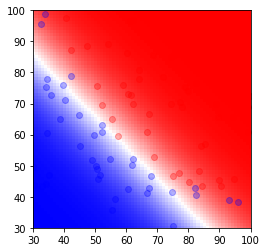

In [0]:
def main():
  theta_0, theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7,theta_8,
   theta_9, theta_10, theta_11, theta_12, theta_13, theta_14, theta_15 = 10, 10, 10, 10, 10, 10, 10, 10,
                                                                         20, 20, 20, 20, 20, 20, 20, 20  #Initialization
  train_costs = deque()
  #theta_0s = deque()
  #theta_1s = deque()
  #theta_2s = deque()
  iters = deque()

  for iter in range(0, 1000000):
    train_value = objectiveFunction(x, y, label, theta_0, theta_1, theta_2)
    #train data 수집
    train_costs.append(train_value)
    theta_0, theta_1, theta_2 = gradientDescent(x, y, label, theta_0, theta_1, theta_2)
    #test_value = objectiveFunction(test_data, theta_0, theta_1, theta_2, theta_3)

    #data 수집
    iters.append(iter)
    theta_0s.append(theta_0)
    theta_1s.append(theta_1)
    theta_2s.append(theta_2)

  print(theta_0, theta_1, theta_2)
  print("Plotting the Estimated Parameters")
  fig = plt.figure()
  graph1 = plt.plot(iters, theta_0s, 'r')
  graph2 = plt.plot(iters, theta_1s, 'g', linewidth = 3, linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
  graph3 = plt.plot(iters, theta_2s, 'b')
  plt.xlabel('iterations')
  plt.ylabel('value')
  plt.show()

  print("Plotting the Training Error")
  plt.plot(iters, train_costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('Traing Error')
  plt.show()

  print("Plotting the Obtained Classifer")
  points = np.arange(30,100,0.5)
  xs,ys = np.meshgrid(points, points)
  z = theta_0 + theta_1 * xs + theta_2 * ys
  z = sigmoidFunction(z)

  fig = plt.figure()
  plt.xlim([30,100])
  plt.ylim([30,100])
  graph4 = plt.imshow(z, cmap=plt.cm.bwr)
  graph5 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
  graph6 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
  plt.show()

if __name__ == "__main__":
  main()